# Final model implementation on Telecom users dataset to predict churn of a user.

## *Using all features*

In this notebook we implement a classification model on Telecom users dataset (obtained from kaggle: https://www.kaggle.com/radmirzosimov/telecom-users-dataset) to predict the churn of a user, using all features of the dataset.

- **Preprocessing**: OneHot encoding + Standardization
- **Model**: GradientBoostingClassifier (GBM)
    - *loss* = 'exponential'
    - *learning_rate* = 0.01
    - *n_estimators* = 500
    - *seed* = 64
-------------------------------------------------------------------------------------------------------------------------------------------------------------

## 0. Import libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd 
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

from sklearn.ensemble import GradientBoostingClassifier

print("Libraries imported!!")

Libraries imported!!


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## 1. Read and pre-process train data

In [2]:
#load the dataset
df = pd.read_csv('telecom_users_train.csv')
#conversions
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce') 
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')
# drop first column
df = df.drop(['Unnamed: 0','customerID','TotalCharges'], axis=1)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,1,Yes,No,28,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,25.70,No
1,Female,0,No,No,6,No,No phone service,DSL,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,47.95,Yes
2,Male,0,No,No,55,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,96.80,Yes
3,Female,0,Yes,Yes,54,Yes,Yes,DSL,No,Yes,Yes,No,No,No,Two year,Yes,Bank transfer (automatic),59.80,No
4,Female,0,No,No,29,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),19.35,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4783,Male,0,Yes,No,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.40,No
4784,Male,0,Yes,Yes,66,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Electronic check,20.35,No
4785,Male,0,No,No,5,Yes,No,DSL,No,No,Yes,Yes,Yes,No,Month-to-month,Yes,Credit card (automatic),63.95,No
4786,Female,0,Yes,Yes,43,Yes,No,DSL,Yes,No,Yes,No,Yes,Yes,Two year,No,Bank transfer (automatic),75.20,No


In [3]:
data_train = df.copy()
cat_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod']
num_features = ['tenure','MonthlyCharges']

#label encoder categorical attributes
for f in cat_features :
    data_train[f] = LabelEncoder().fit_transform(data_train[f])

#one-hot encode categorical attributes and join with numerical attributes
onehot_encoder = OneHotEncoder().fit(data_train[cat_features])
encoded = onehot_encoder.transform(data_train[cat_features]).toarray()
X_train = np.column_stack((encoded, data_train[num_features].values))

#standardize the data
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

#get labels of the data
y_train = data_train['Churn'].values

#print shape of data
print('X_train shape :', X_train.shape)
print('y_train shape :', y_train.shape)

X_train shape : (4788, 45)
y_train shape : (4788,)


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## 2. Initialize and train the model

In [4]:
#initialize the model
model = GradientBoostingClassifier(loss='exponential', learning_rate=0.01, n_estimators=500, verbose=True, random_state=64)
print('Model initialized!!')

#fit the model
model.fit(X_train, y_train)
print('Model trained!!')

Model initialized!!
      Iter       Train Loss   Remaining Time 
         1           0.8830            5.97s
         2           0.8801            5.21s
         3           0.8772            4.96s
         4           0.8744            5.07s
         5           0.8716            4.84s
         6           0.8688            4.76s
         7           0.8661            4.57s
         8           0.8634            4.48s
         9           0.8607            4.41s
        10           0.8581            4.35s
        20           0.8342            3.93s
        30           0.8132            3.73s
        40           0.7947            3.61s
        50           0.7786            3.48s
        60           0.7644            3.44s
        70           0.7521            3.40s
        80           0.7417            3.29s
        90           0.7326            3.20s
       100           0.7247            3.10s
       200           0.6797            2.28s
       300           0.6606       

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## 3. Read and preprocess test data

In [5]:
#load the dataset
df = pd.read_csv('telecom_users_test.csv')
#conversions
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce') 
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')
# drop first column
df = df.drop(['Unnamed: 0','customerID','TotalCharges'], axis=1)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Male,1,Yes,No,46,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,80.40,Yes
1,Male,0,Yes,No,51,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.65,Yes
2,Male,0,Yes,Yes,68,Yes,No,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),105.75,No
3,Male,1,Yes,No,65,Yes,Yes,Fiber optic,Yes,Yes,No,No,Yes,No,Two year,Yes,Credit card (automatic),92.70,No
4,Male,0,Yes,No,25,No,No phone service,DSL,No,No,Yes,No,Yes,No,One year,Yes,Credit card (automatic),38.10,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,45.60,No
1194,Male,0,Yes,No,70,Yes,No,DSL,Yes,Yes,No,Yes,No,Yes,Two year,No,Mailed check,67.95,No
1195,Female,1,No,No,1,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.30,Yes
1196,Female,0,Yes,Yes,67,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,No,Two year,No,Credit card (automatic),94.10,No


In [6]:
data_test = df.copy()

#label encoder categorical attributes
for f in cat_features :
    data_test[f] = LabelEncoder().fit_transform(data_test[f])

#one-hot encode categorical attributes and join with numerical attributes
encoded = onehot_encoder.transform(data_test[cat_features]).toarray()
X_test = np.column_stack((encoded, data_test[num_features].values))

#standardize data
X_test = scaler.transform(X_test)

#get labels of the data
y_test = data_test['Churn'].values

#print shape of data
print('X_test shape :', X_test.shape)
print('y_test shape :', y_test.shape)

X_test shape : (1198, 45)
y_test shape : (1198,)


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## 4. Make predictions and evaluate results

In [7]:
#make predictions
predictions = model.predict(X_test)

#get the classification report
print('Obtained accuracy with test data: ', accuracy_score(y_test, predictions), '\n')
print(classification_report(y_test, predictions))

Obtained accuracy with test data:  0.8063439065108514 

              precision    recall  f1-score   support

          No       0.85      0.90      0.87       895
         Yes       0.64      0.53      0.58       303

    accuracy                           0.81      1198
   macro avg       0.75      0.72      0.73      1198
weighted avg       0.80      0.81      0.80      1198



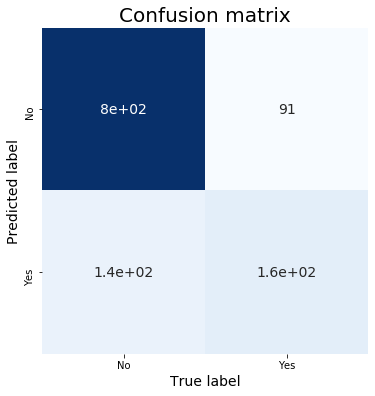

In [8]:
#plot the confussion matrix
plt.figure(figsize = (8,6))
sns.heatmap(confusion_matrix(y_test, predictions), square=True, annot=True, annot_kws={"size": 14},
                cmap='Blues', cbar=False, xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])

plt.xlabel('True label', fontsize=14)
plt.ylabel('Predicted label', fontsize=14)
plt.title('Confusion matrix', fontsize=20)
plt.show()

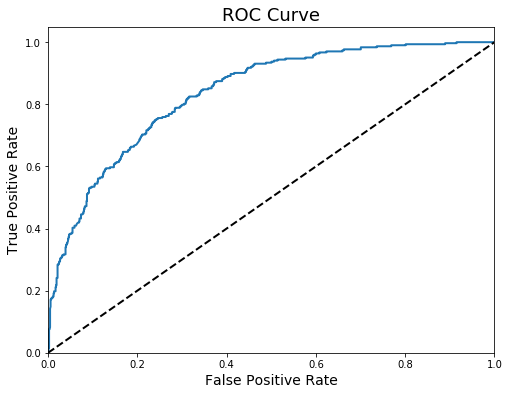

AUC of the ROC curve:  0.8369434150118923


In [9]:
#plot the AUC curve
y_prob = model.predict_proba(X_test)
lb = LabelBinarizer()
y_test = lb.fit_transform(y_test)
#Compute and plot ROC curve and ROC area for each class
plt.figure(figsize = (8,6))
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=18)
plt.show()
print('AUC of the ROC curve: ', roc_auc)

With this model we have obtained an accuracy value of 0.8063, which is a nice value.

However, let's see if we can improve this accuracy deleting some features of the dataset.